# Argon Emission Spectrum
Comparing the emission lines of Argon to the LSP spectrum measured by Zimakov et al. [1]

OOPS. Zimakov plotted a xenon spectrum... just assume everything is Xenon.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

try:
    argonLines = pd.read_html(  # This fails sometimes... use cache if that happens
        'https://physics.nist.gov/PhysRefData/Handbook/Tables/xenontable2.htm',
        # 'https://physics.nist.gov/PhysRefData/Handbook/Tables/argontable2.htm',
        match='Air'
        )[1]
    # Some cleanup
    argonLines.dropna(axis=0, how='all', inplace=True)
    argonLines.dropna(axis=1, how='all', inplace=True)
    argonLines['Intensity'] = argonLines['Intensity'].map(
        lambda s: s.rstrip(' Phls'))
    argonLines['Intensity'] = pd.to_numeric(argonLines['Intensity'])
    argonLines.to_csv('../cachedata/xenonSpectrum.csv')
    # argonLines.to_csv('../cachedata/argonSpectrum.csv')
except:
    print('Warning: Could not access data from NIST, falling back to cache...')
    argonLines = pd.read_csv('../cachedata/xenonSpectrum.csv', index_col=0)
    # argonLines = pd.read_csv('../cachedata/argonSpectrum.csv', index_col=0)

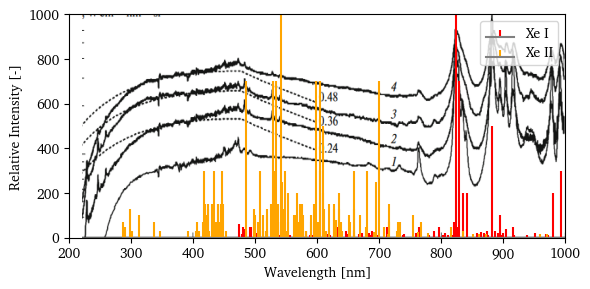

In [5]:
argonLines['Wavelength [nm]'] = argonLines['Air Wavelength (Å)']/10
ArILines = argonLines[argonLines['Spectrum'] == 'Xe I']
ArIILines = argonLines[argonLines['Spectrum'] == 'Xe II']
# ArILines = argonLines[argonLines['Spectrum'] == 'Ar I']
# ArIILines = argonLines[argonLines['Spectrum'] == 'Ar II']

zimakovData = np.asarray(Image.open('../rawdata/zimakov.png'))
plt.imshow(zimakovData, extent=(220, 1000, 0, 1000))
# plt.stem(ArILines['Wavelength [nm]'], ArILines['Intensity'], label='Ar I',
#          linefmt='red', markerfmt='', basefmt='grey')
# plt.stem(ArIILines['Wavelength [nm]'], ArIILines['Intensity'], label='Ar II',
#          linefmt='orange', markerfmt='', basefmt='grey')
plt.stem(ArILines['Wavelength [nm]'], ArILines['Intensity'], label='Xe I',
         linefmt='red', markerfmt='', basefmt='grey')
plt.stem(ArIILines['Wavelength [nm]'], ArIILines['Intensity'], label='Xe II',
         linefmt='orange', markerfmt='', basefmt='grey')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative Intensity [-]')
plt.xlim(200, 1000)
ax = plt.gca()
ax.set_aspect(265/736)
plt.legend()
plt.show()